### **Import libraries:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


### **Load Data:**

In [2]:
df_cf = pd.read_csv('Transformed_Student_Performence_Data.csv')
df_cf.head()



,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,19.833723,7,1,2,0,0,1,0,2
1,15.408756,0,0,1,0,0,0,0,1
2,4.210570,26,0,2,0,0,0,0,4
3,10.028829,14,0,3,1,0,0,0,3
4,4.672495,17,1,3,0,0,0,0,4


### **Data Preprocessing:**

In [3]:
# Assigning the independent variables to the X and the dependent variables to y.

X= df_cf.iloc[:,:-1].values # Drops column "GradeClass"and stores all the other column values in a array
y= df_cf.iloc[:,-1].values # Stores the values of the "GradeClass" column in a array.

# Splits the data into 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the x values 
sc = StandardScaler() # Scales the unit variance and removes the mean of the x_training data.
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### **Cumulative Ordinal Regression(Coral) Method:**

The CORAL method is a method to convert **ordinal data(0, 1, 2, 3,...)** into a binary format **(0 = 0000, 1 = 0001, 2 = 0010)**.

In [4]:
# Function for converting the ordinal data of Gradeclass into binary data
def coral_target(y, num_classes): 
    thresholds = np.arange(num_classes - 1) # Sets the limits for the binary data
    return (y[:, None] > thresholds).astype(int) # Returns the converted binary values.

num_classes = len(np.unique(y)) # Counts the number of labels in our "GradeClass"
y_train_coral = coral_target(y_train, num_classes)
y_test_coral = coral_target(y_test, num_classes)

### **Artificail Neural Network Deep-learning Model:**

#### **Building the ANN model:**

In [5]:
ANN = models.Sequential([  #Initializes the ANN
    
    # Input layer
    layers.Input(shape=(X.shape[1],)), #Takes one column as input at a time.

    # Hidden layer 
    layers.Dense(units=128, activation='relu'), # Sorts through all of the probabilities using a 128 nodes.

    # Output layer
    layers.Dense(num_classes - 1, activation='sigmoid')  # One sigmoid per threshold
])


#### **Training the ANN:**

In [6]:
# Compiling the ANN
ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #This tells the model how to train

# Fitting the training data into the model
ANN.fit(X_train, y_train_coral, epochs=40, batch_size=32, validation_data=(X_test, y_test_coral))

Epoch 1/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6629 - loss: 0.6177 - val_accuracy: 0.8121 - val_loss: 0.4096
Epoch 2/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8793 - loss: 0.3667 - val_accuracy: 0.9228 - val_loss: 0.2759
Epoch 3/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9045 - loss: 0.2519 - val_accuracy: 0.8559 - val_loss: 0.2097
Epoch 4/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8294 - loss: 0.1887 - val_accuracy: 0.7495 - val_loss: 0.1751
Epoch 5/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7254 - loss: 0.1616 - val_accuracy: 0.6639 - val_loss: 0.1553
Epoch 6/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6495 - loss: 0.1385 - val_accuracy: 0.6159 - val_loss: 0.1426
Epoch 7/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6052 - loss: 0.1313 - val_accuracy: 0.5741 - val_loss: 0.1348
Epoch 8/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5761 - loss: 0.1160 - val_accuracy: 0.5553 - val_loss:

### **Predicting GradeClass:**

In [7]:
def ANN_predict(y_pred_sigmoids): # Converts the predicted binary values back into ordinal values.
    return np.sum(y_pred_sigmoids > 0.5, axis=1)

# Predicts Grade class in binary format
y_pred_sigmoids = ANN.predict(X_test)

# Converts the Grade Class values back into ordinal data
y_pred_classes = ANN_predict(y_pred_sigmoids)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


### **Evaluating predicted data:**

#### **Evaluation:**

In [8]:
# Evaluation of the predicted data
print(classification_report(y_test, y_pred_classes)) #Outputs a summary of the models performance

              precision    recall  f1-score   support

           0       0.90      0.56      0.69        16
           1       0.65      0.73      0.69        49
           2       0.69      0.71      0.70        80
           3       0.68      0.61      0.64        85
           4       0.93      0.94      0.93       249

    accuracy                           0.81       479
   macro avg       0.77      0.71      0.73       479
weighted avg       0.81      0.81      0.81       479



#### **Displaying evaluated data:**

In [9]:
# Creates a table for the actual & predicted data
df_results = pd.DataFrame({     
    "Actual": y_test,
    "Predicted": y_pred_classes
})
df_results.head(10)


,Actual,Predicted
0,4,4
1,1,2
2,3,4
3,0,0
4,4,4
5,2,2
6,3,4
7,3,3
8,3,3
9,4,4


#### **Visualising evaluated data:**

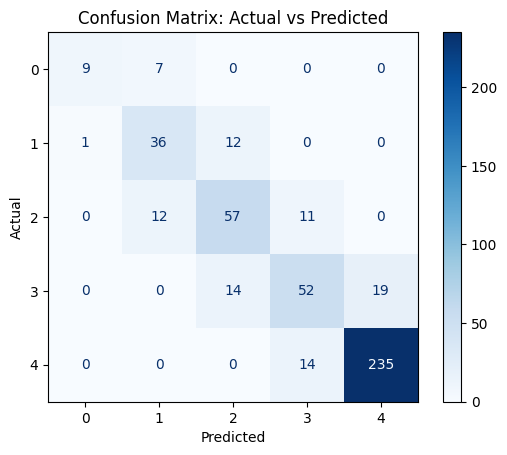

In [10]:
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Actual vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

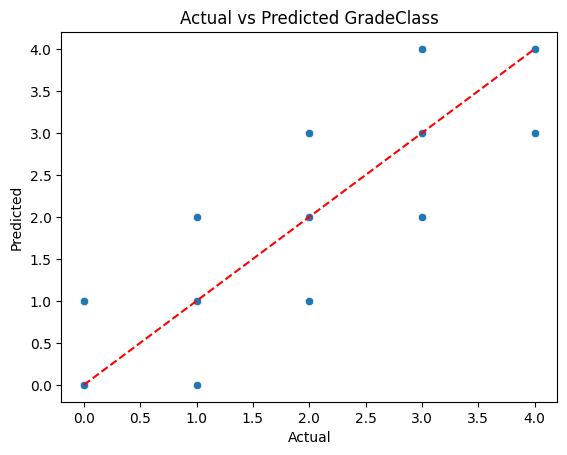

In [11]:
sns.scatterplot(data=df_results, x="Actual", y="Predicted")
plt.title("Actual vs Predicted GradeClass")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()